# 乳腺癌合并其他癌症的数据挖掘

## 0. 预处理数据

In [119]:
# 数据另存为.pkl格式加速读取，执行一次

# import pandas as pd

# SinglePrimaryCancer = pd.read_excel('9-9 单原发癌 2010-2016 已编码.xlsx')
# SinglePrimaryCancer.to_pickle('SinglePrimaryCancer.pkl')

# DoublePrimaryCancer = pd.read_excel('9-9 双原发癌 2010-2016 已编码.xlsx')
# DoublePrimaryCancer.to_pickle('DoublePrimaryCancer.pkl')

In [120]:
# 将单原发癌与双原发癌表合并，添加label标签 单原发癌 0，双原发癌 1，执行一次

# import pandas as pd

# SinglePrimaryCancer = pd.read_pickle('SinglePrimaryCancer.pkl')
# SinglePrimaryCancer['label'] = 0
# DoublePrimaryCancer = pd.read_pickle('DoublePrimaryCancer.pkl')
# DoublePrimaryCancer['label'] = 1
# data = SinglePrimaryCancer.append(DoublePrimaryCancer)
# data['Patient ID'].nunique() # 323435 = 315147+8288 证明无重复计数
# data.to_pickle('data.pkl')

## 1. 读取数据

In [121]:
# 读取单发乳腺癌数据

import pandas as pd

data = pd.read_pickle('data.pkl')

## 2. 数据描述

### 2.1 数据简表

In [122]:
data

,Patient ID,Year of diagnosis,Age at diagnosis,"Race recode (W, B, AI, API)",Marital status at diagnosis,Primary Site - labeled,Laterality,Nottingham or Bloom-Richardson (BR) Score/Grade,Stage,T,...,Derived HER2 Recode (2010+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Radiation recode,"Chemotherapy recode (yes, no/unk)",COD to site recode,Survival months,label
0,2422241,6,1,0,0,7,1,1,2,4,...,0,0,0,0,0,1,1,0,11,0
1,2884393,6,4,0,0,3,1,1,1,2,...,0,0,0,0,0,0,0,0,8,0
2,2904731,6,4,0,0,2,0,1,1,2,...,0,0,0,0,0,0,0,0,5,0
3,2973580,6,3,0,0,3,1,1,1,2,...,0,0,0,0,0,1,0,0,1,0
4,3523541,6,3,0,0,5,0,3,2,4,...,3,2,2,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,74285927,6,1,0,0,5,1,1,2,3,...,0,0,0,0,0,1,0,0,10,1
8284,74298618,6,1,0,0,4,1,2,2,2,...,0,0,0,0,0,1,1,0,8,1
8285,77672817,6,2,0,0,3,0,0,1,2,...,0,0,0,0,0,1,0,0,10,1
8286,77674417,6,3,0,0,5,1,1,1,2,...,0,0,0,0,0,1,1,0,11,1


In [123]:
data.groupby('label').size()

label
0    315147
1      8288
dtype: int64

---

**解析**

1. 年度： 2010 - 2016 年 

2. 共计 323435例，其中**单原发癌**共计：315147例；**双原发癌**共计：8288例；单原发癌:双原发癌 = 38:1；单原发癌 97.4%，双原发癌 2.6%

---

### 2.2 数据列名

In [124]:
data.columns

Index(['Patient ID', 'Year of diagnosis', 'Age at diagnosis',
       'Race recode (W, B, AI, API)', 'Marital status at diagnosis',
       'Primary Site - labeled', 'Laterality',
       'Nottingham or Bloom-Richardson (BR) Score/Grade', 'Stage', 'T', 'N',
       'M', 'Breast Subtype (2010+)', 'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)', 'Radiation recode',
       'Chemotherapy recode (yes, no/unk)', 'COD to site recode',
       'Survival months', 'label'],
      dtype='object')

---

**解析**

1. 特征数：25项

- Patient ID
- Year of diagnosis: 2010 →0, 2011 →1, 2012 →2, 2013 →3, 2014 →4, 2015 →5
- Age at diagnosis: <45 →0, ≥45~<55 →1, ≥55~<65 →2, ≥65~<75 →3, ≥85 →4
- Race recode (W, B, AI, API): White →0；Black →1；Asian or Pacific Islander →2；American Indian/Alaska Native →4
- Marital status at diagnosis: Married →0；Divorced →1, Single →2, Widowed →3, Separated →4, Unmarried or Domestic Partner →5, Unknown →6
- Primary Site - labeled: C50.1-Central portion of breast →1, C50.2-Upper-inner quadrant of breast →2, C50.3-Lower-inner quadrant of breast →3, C50.4-Upper-outer quadrant of breast→4, C50.5-Lower-outer quadrant of breast →5, C50.6-Axillary tail of breast →6, C50.8-Overlapping lesion of breast →7, C50.9-Breast, NOS →8
- Laterality: Left →0, Right →1, Other →2
- Nottingham or Bloom-Richardson (BR) Score/Grade: I →0, II →1, III →2, Unknown →3
- Stage: 0 →0, I →1, II →2, III →3, IV →4, Unknow →5
- T: T0 →0, Tis →1, T1 →2, T2 →3, T3 →4, T4 →5, Tx →6, Unknown →7
- N: N0 →0, N1 →1, N2 →2, N3 →3, Nx →4, Unknown →5
- M: M0 →0, M1 →1, Unknown →2
- Breast Subtype (2010+): HR+/HER2- (Luminal A) →0, HR+/HER2+ (Luminal B) →1, HR-/HER2+ (HER2 enriched) →2, HR-/HER2- (Triple Negative) →3, Unknown →4
- ER Status Recode Breast Cancer (1990+): Positive →0, Negative →1, Borderline →2, Unknown →3
- PR Status Recode Breast Cancer (1990+): Positive →0, Negative →1, Borderline →2, Unknown →3
- Derived HER2 Recode (2010+): Positive →0, Negative →1, Borderline →2, Unknown →3
- SEER Combined Mets at DX-bone (2010+): No →0, Yes →1, Unknown →2
- SEER Combined Mets at DX-brain (2010+): No →0, Yes →1, Unknown →2
- SEER Combined Mets at DX-liver (2010+): No →0, Yes →1, Unknown →2
- SEER Combined Mets at DX-lung (2010+): No →0, Yes →1, Unknown →2
- Radiation recode: No/Unknown →0, Yes →1
- Chemotherapy recode (yes, no/unk): No/Unknown →0, Yes →1
- COD to site recode: Alive →0, Breast →1, Other →2  (cause of death)
- Survival months
- label: Single Cancer →0, Double Cancer →1

---

### 2.3 分列描述

#### 2.3.1 Patient ID - 数据库索引号

#### 2.3.2 Year of diagnosis: 2010 →0, 2011 →1, 2012 →2, 2013 →3, 2014 →4, 2015 →5

In [125]:
data.groupby('Year of diagnosis').size()

Year of diagnosis
0    42480
1    44432
2    45041
3    46328
4    47169
5    48674
6    49311
dtype: int64

In [126]:
data.groupby(['Year of diagnosis', 'label']).size()

Year of diagnosis  label
0                  0        40243
                   1         2237
1                  0        42504
                   1         1928
2                  0        43483
                   1         1558
3                  0        45073
                   1         1255
4                  0        46347
                   1          822
5                  0        48245
                   1          429
6                  0        49252
                   1           59
dtype: int64

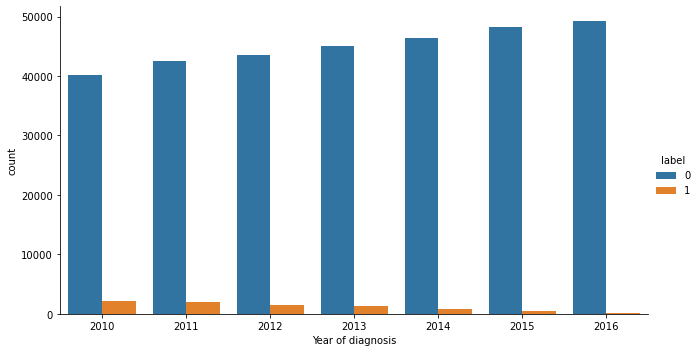

In [127]:
import seaborn as sns

yearplot = sns.catplot(x='Year of diagnosis', kind='count', hue='label', data=data, height=5, aspect=1.8)
yearplot.set_xticklabels(['2010', '2011', '2012', '2013', '2014', '2015', '2016']);

---

**解析**

1. 单发癌从2010年42480缓慢上升到2016年49311例

2. 双原发癌从2010年2237例缓慢下降到2016年59例

3. 原因为：XXXXX

---

#### 2.3.3 Age at diagnosis: <45 →0, ≥45~<55 →1, ≥55~<65 →2, ≥65~<75 →3, ≥75~<85 →4, ≥85 →5

In [128]:
data.groupby('Age at diagnosis').size()

Age at diagnosis
0    39831
1    72611
2    86029
3    73537
4    37770
5    13657
dtype: int64

In [129]:
data.groupby(['Age at diagnosis', 'label']).size()


Age at diagnosis  label
0                 0        39249
                  1          582
1                 0        71219
                  1         1392
2                 0        83939
                  1         2090
3                 0        71250
                  1         2287
4                 0        36245
                  1         1525
5                 0        13245
                  1          412
dtype: int64

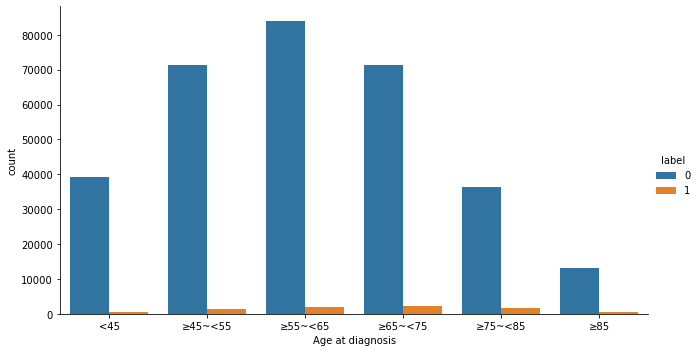

In [130]:
yearplot = sns.catplot(x='Age at diagnosis', kind='count', hue='label', data=data, height=5, aspect=1.8)
yearplot.set_xticklabels(['<45', '≥45~<55', '≥55~<65', '≥65~<75', '≥75~<85', '≥85']);

---

**解析**

1. XXX

---